In [1]:
import os

os.environ['XLA_PYTHON_CLIENT_PREALLOCATE'] = 'false'
os.environ['CUDA_VISIBLE_DEVICES'] = '3'
from pathlib import Path
root_path = Path.cwd().parent.absolute()
import sys
sys.path.append(str(root_path))
import os

In [2]:

from flax import nnx
import jax
from jax._src.tree_util import tree_structure
import jax.numpy as jnp
from jaxtyping import Array

In [3]:
from architectures.node import NeuralODE
from architectures.utils_node import eval_model
from architectures.architectures import MLP,ResNet
from geometry.G_matrix import G_matrix
from functionals.functions import create_potentials
from functionals.linear_funcitonal_class import LinearPotential
from functionals.functions import zero_potential_fn
from functionals.internal_functional_class import InternalPotential
from functionals.interaction_functional_class import InteractionPotential
from functionals.functional import Potential
from flows.hamiltonian_flow_step import hamiltonian_flow_step
from flows.hamiltonian_flow import initialize_momentum, run_hamiltonian_flow
from parametric_model.parametric_model import ParametricModel


In [4]:
device = 0

In [5]:
# Define the parametric model
parametric_model = ParametricModel(
    parametric_map="node", # "node" "resnet"
    architecture=[2, 1, 2], # [input_dim, num_layers, hidden_width]
    activation_fn="sigmoid", # "tanh", "relu", "SinTu", "identity"
    time_dependent=True,    # True or False
    solver="euler", # "euler" or "heun"
    dt0=0.5,
    rhs_model="mlp", # "mlp" or "resnet"
    ref_density="gaussian",
    scale_factor=0.0
)

In [6]:
_, initial_params = nnx.split(parametric_model)

In [7]:
def phi_fn(t: float,x: Array) -> Array:
    ''' phi(t,x) = -x[0]^2/2 '''
    return -x[:,0]**2/2

In [8]:
n_samples = 2_000  # Monte Carlo sample size
key = jax.random.PRNGKey(1234)
rngs = nnx.Rngs(key)
# Generate reference samples from lambda = N(0, I)
key, subkey = jax.random.split(key)
test_data_set = jax.random.normal(subkey, (n_samples, 2))
G_mat = G_matrix(parametric_model)

In [9]:
key, subkey = jax.random.split(key)
z_samples = jax.random.normal(subkey, (n_samples, 2))
p = initialize_momentum(parametric_model = parametric_model,z_samples=z_samples,phi_fn=phi_fn)

In [10]:
zero_potential = LinearPotential(zero_potential_fn)
potential = Potential(zero_potential)

# Initialize the variable for a Hamiltonian step

In [11]:
step_size = 1e-2
solver = 'cg'
gamma = 1e-2

Initial Hamiltonian: 0.587986


Hamiltonian Flow Progress:  10%|█         | 10/99 [00:12<01:20,  1.10it/s, Energy=0.000000, Linear=0.000000, Internal=0.000000, Interaction=0.000000, ||p||=0.440947, ||delta theta||=0.052308]

Iter  10: Energy = 0.000000, Hamiltonian = 0.591729, H_drift = 3.74e-03, Avg_Displacement = 9.79e-02


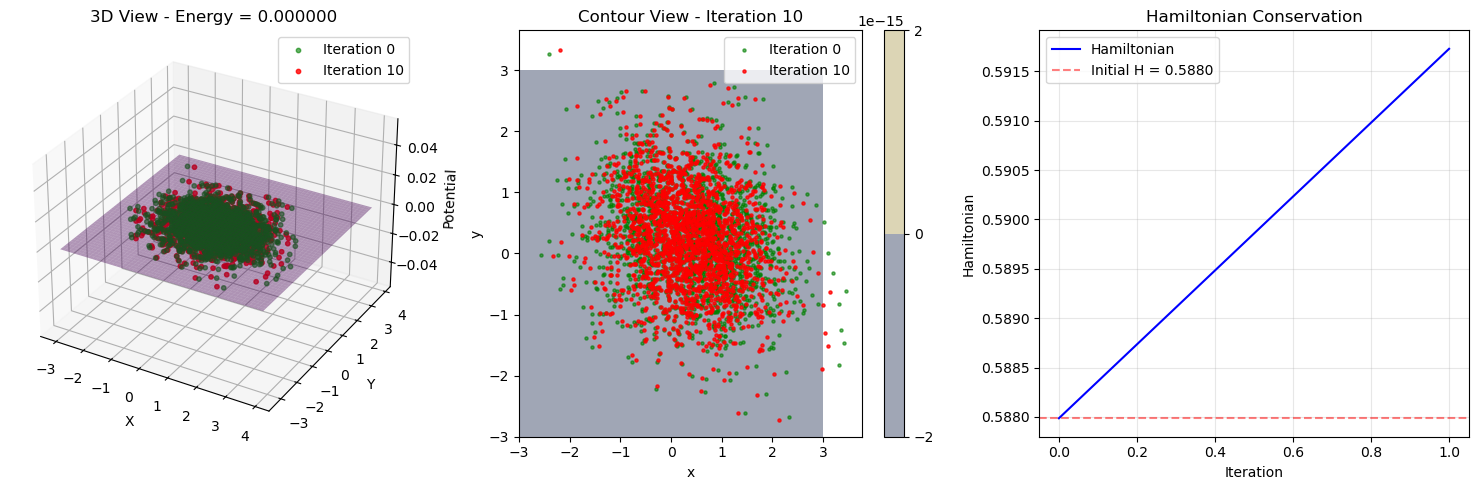

Hamiltonian Flow Progress:  20%|██        | 20/99 [00:25<01:11,  1.10it/s, Energy=0.000000, Linear=0.000000, Internal=0.000000, Interaction=0.000000, ||p||=0.449568, ||delta theta||=0.048264]

Iter  20: Energy = 0.000000, Hamiltonian = 0.592931, H_drift = 4.95e-03, Avg_Displacement = 9.07e-02


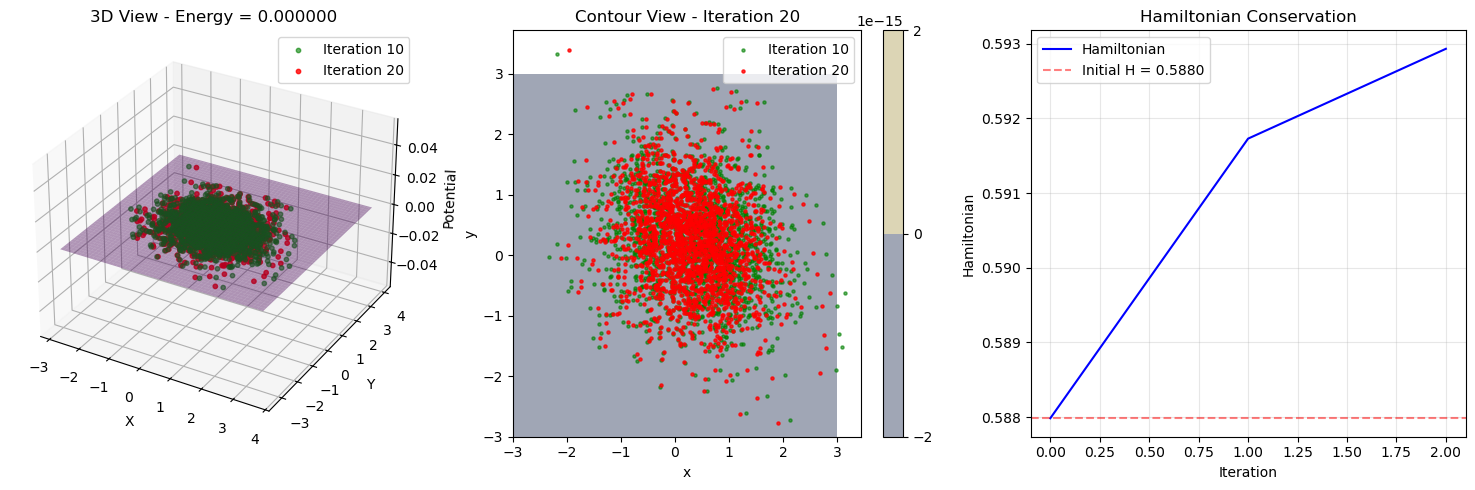

Hamiltonian Flow Progress:  30%|███       | 30/99 [00:35<01:01,  1.12it/s, Energy=0.000000, Linear=0.000000, Internal=0.000000, Interaction=0.000000, ||p||=0.462811, ||delta theta||=0.044140]

Iter  30: Energy = 0.000000, Hamiltonian = 0.595605, H_drift = 7.62e-03, Avg_Displacement = 9.02e-02


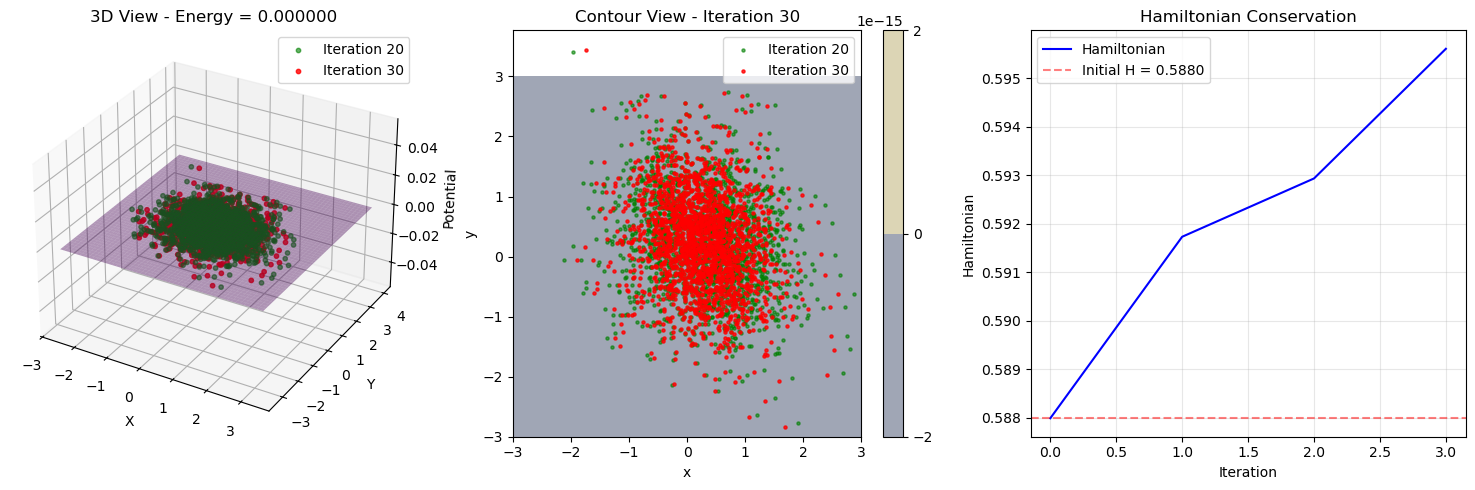

Hamiltonian Flow Progress:  40%|████      | 40/99 [00:46<00:53,  1.11it/s, Energy=0.000000, Linear=0.000000, Internal=0.000000, Interaction=0.000000, ||p||=0.473343, ||delta theta||=0.051578]

Iter  40: Energy = 0.000000, Hamiltonian = 0.596245, H_drift = 8.26e-03, Avg_Displacement = 9.01e-02


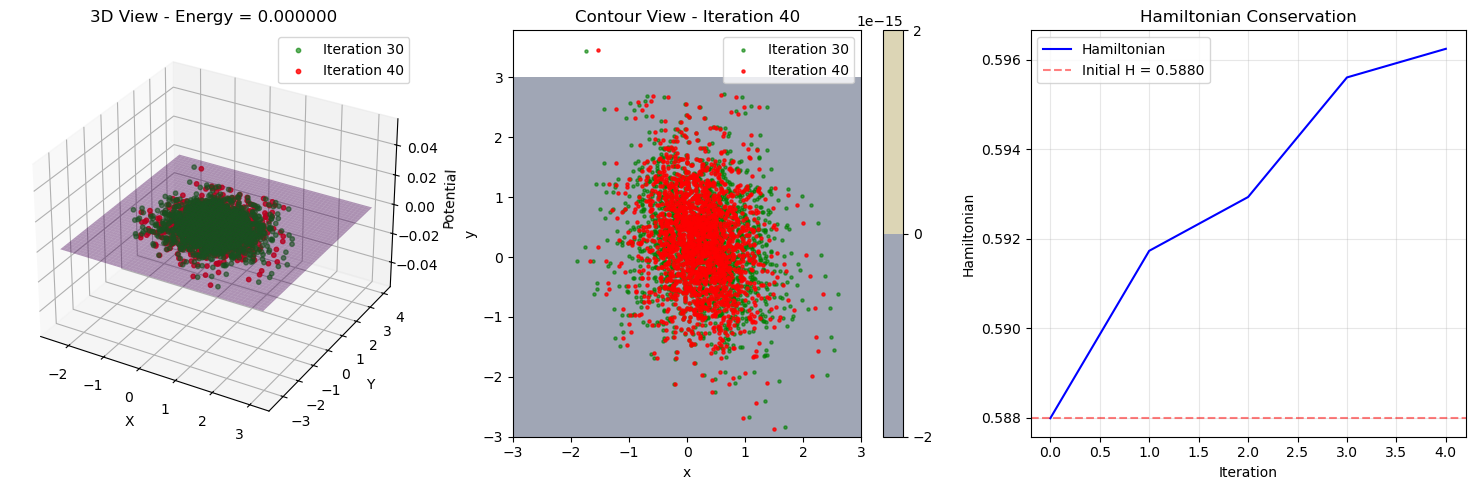

Hamiltonian Flow Progress:  51%|█████     | 50/99 [00:57<00:44,  1.11it/s, Energy=0.000000, Linear=0.000000, Internal=0.000000, Interaction=0.000000, ||p||=0.475359, ||delta theta||=0.050122]

Iter  50: Energy = 0.000000, Hamiltonian = 0.586256, H_drift = -1.73e-03, Avg_Displacement = 8.86e-02


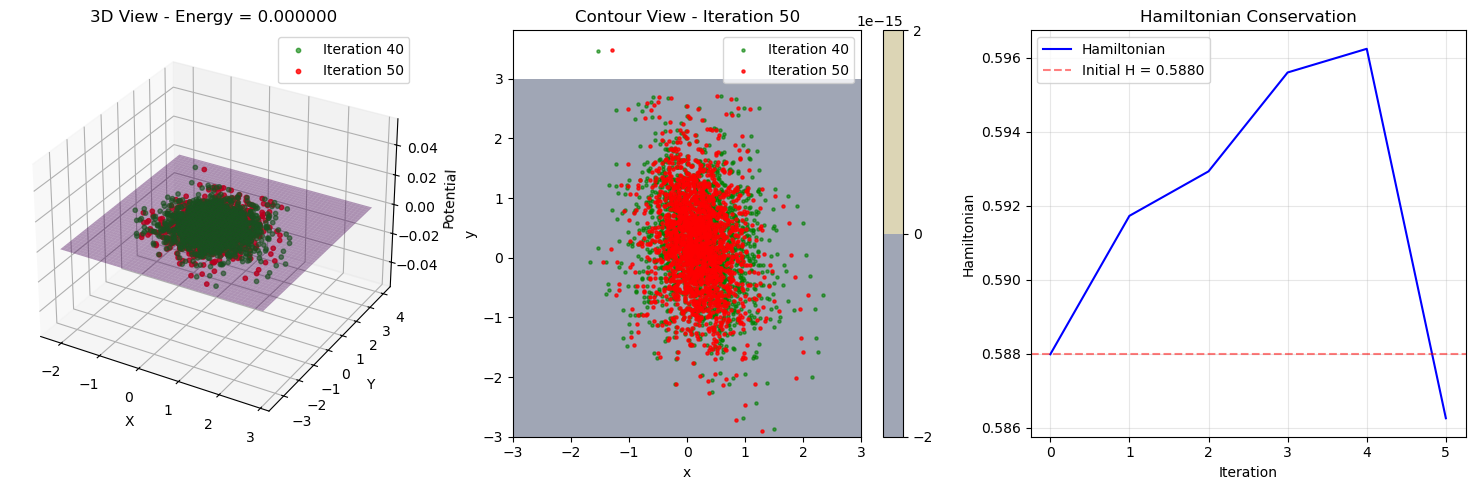

Hamiltonian Flow Progress:  61%|██████    | 60/99 [01:07<00:35,  1.10it/s, Energy=0.000000, Linear=0.000000, Internal=0.000000, Interaction=0.000000, ||p||=0.466962, ||delta theta||=0.041155]

Iter  60: Energy = 0.000000, Hamiltonian = 0.590157, H_drift = 2.17e-03, Avg_Displacement = 8.92e-02


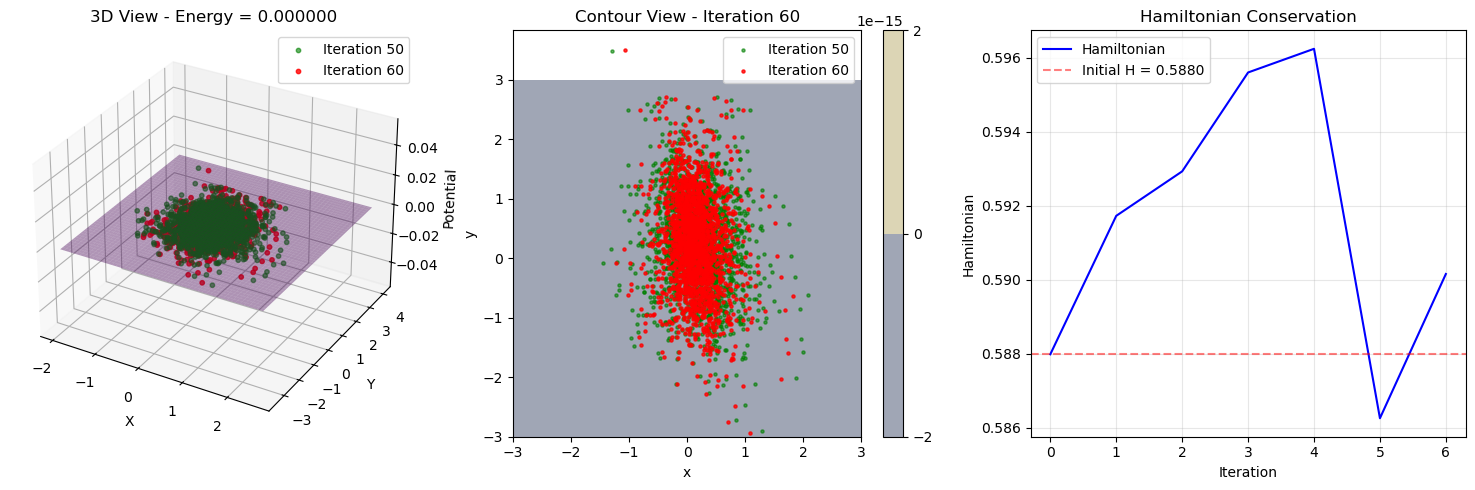

Hamiltonian Flow Progress:  71%|███████   | 70/99 [01:18<00:26,  1.11it/s, Energy=0.000000, Linear=0.000000, Internal=0.000000, Interaction=0.000000, ||p||=0.439361, ||delta theta||=0.040142]

Iter  70: Energy = 0.000000, Hamiltonian = 0.587965, H_drift = -2.13e-05, Avg_Displacement = 8.92e-02


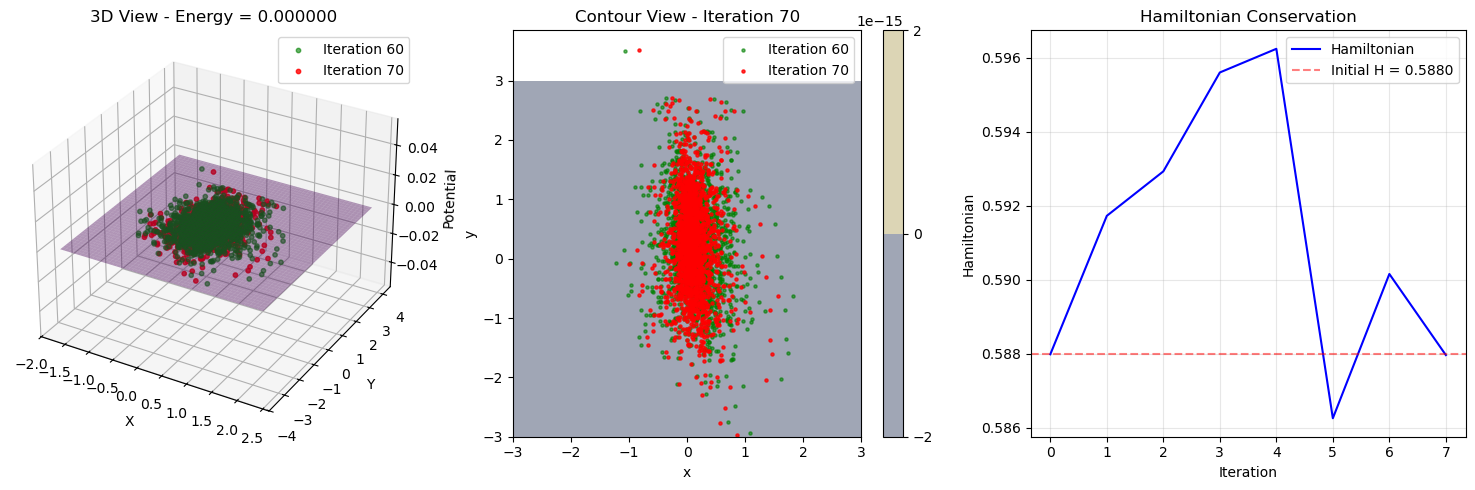

Hamiltonian Flow Progress:  81%|████████  | 80/99 [01:29<00:17,  1.11it/s, Energy=0.000000, Linear=0.000000, Internal=0.000000, Interaction=0.000000, ||p||=0.392893, ||delta theta||=0.053314]

Iter  80: Energy = 0.000000, Hamiltonian = 0.586330, H_drift = -1.66e-03, Avg_Displacement = 8.76e-02


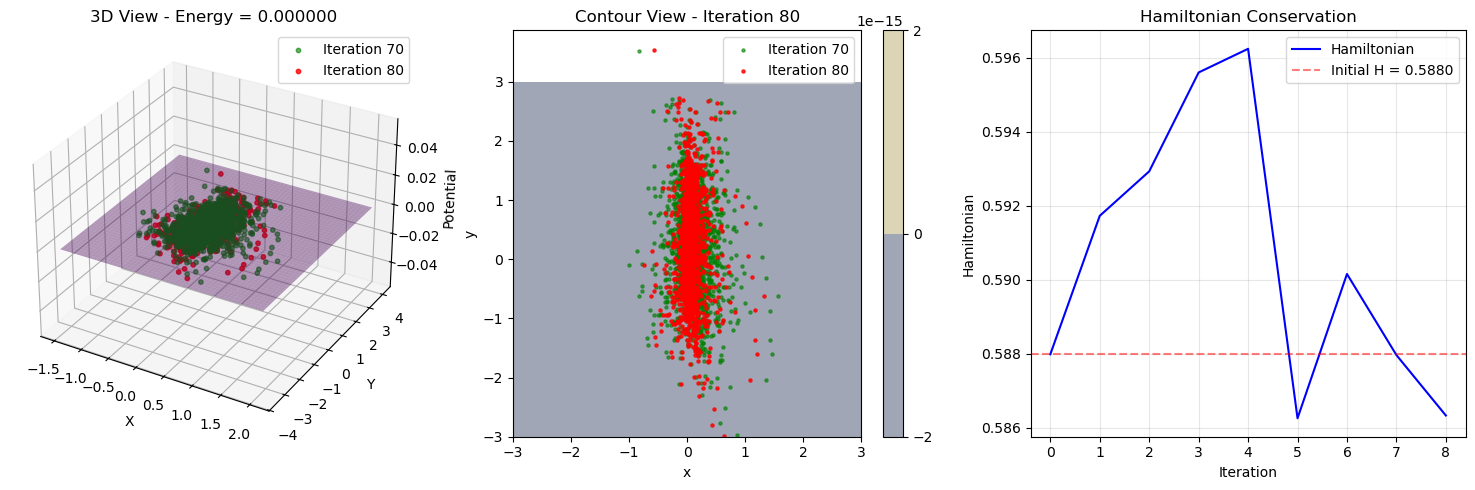

Hamiltonian Flow Progress:  91%|█████████ | 90/99 [01:40<00:08,  1.09it/s, Energy=0.000000, Linear=0.000000, Internal=0.000000, Interaction=0.000000, ||p||=0.323953, ||delta theta||=0.062371]

Iter  90: Energy = 0.000000, Hamiltonian = 0.642503, H_drift = 5.45e-02, Avg_Displacement = 7.86e-02


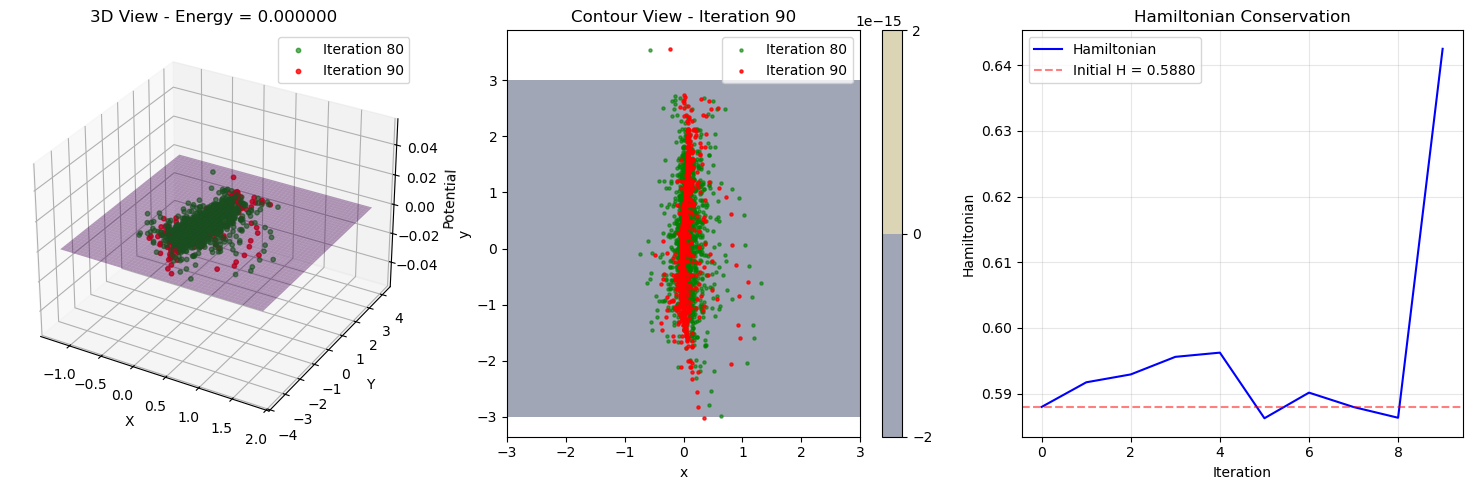

Hamiltonian Flow Progress:  99%|█████████▉| 98/99 [01:49<00:00,  1.07it/s, Energy=0.000000, Linear=0.000000, Internal=0.000000, Interaction=0.000000, ||p||=0.277550, ||delta theta||=0.099288]

Iter  98: Energy = 0.000000, Hamiltonian = 0.792038, H_drift = 2.04e-01, Avg_Displacement = 6.40e-02


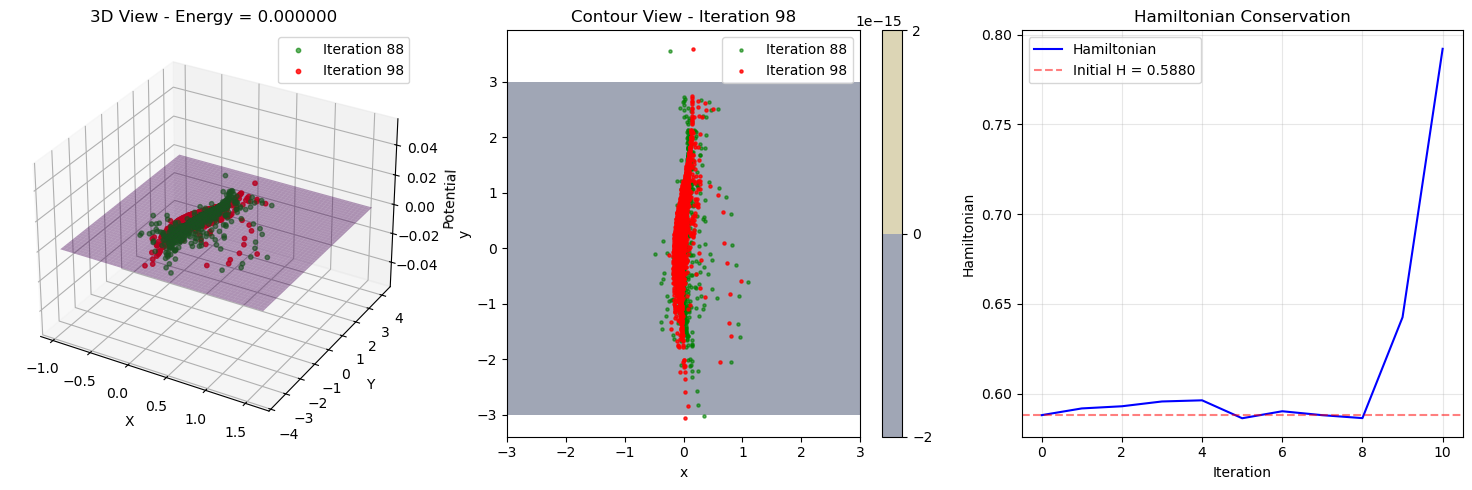

Hamiltonian Flow Progress: 100%|██████████| 99/99 [01:51<00:00,  1.12s/it, Energy=0.000000, Linear=0.000000, Internal=0.000000, Interaction=0.000000, ||p||=0.277550, ||delta theta||=0.099288]


=== Hamiltonian Integration Complete ===
Total iterations:         99
Initial Hamiltonian:      0.587986
Final Hamiltonian:        0.792038
Total Hamiltonian drift:  2.04e-01
Relative drift:           3.47e-01
Final energy:             0.000000
Final momentum norm:      0.277550
Final param norm:         5.949443


In [12]:
results = run_hamiltonian_flow(
    parametric_model=parametric_model,
    batch_size=n_samples,
    test_data_set=test_data_set,
    G_mat=G_mat,
    potential=potential,
    phi_fn=phi_fn,
    max_iterations=100,
    n_iters=2,
    h=step_size,
    solver=solver,
    progress_every=10,
    solver_maxiter=10,
    gamma=gamma,
    regularization=1e-3
)